The model can be written as

Salary = β0 + β1X1 + β2X2 + β3X3 + β4(X1.X2) + β5(X1.X3)

Where:-

*   X1 = GPA
*   X2 = IQ

*   X3 = Level (College=1,High school=0)
*   X4 = X1.X2

*   X5 = X1.X3
*   β0 = 50

*   β1 = 20
*   β2 = 0.07

*   β3 = 35
*   β4 = 0.01

*   β5 = -10

The impact of being a college graduate and a high school graduate can be analyzed by comparing the effect of X3 and it's relation with the GPA.

For high school graduates(X3=0):

Salary = 50 +20X1 + 0.07X2 + 0.01(X1.X2)

For college graduates(X3=1):

Salary = 50 + 20X1 + 0.07X2 + 35 + 0.01(X1.X2) - 10X1

By solving we will get:-

Salary = 85 + 10X1 + 0.07X2 + 0.01(X1.X2)

Thus for high school graduates, salary depends more on GPA with coefficient 20 and for college graduates the GPA coefficient is 10 and an additional fixed boost of 35.

Thus, for low GPAs, college graduates will tend to earn more due to the fixed boost of 35 in their salary.

**So, the correct answer is option (iii)**













Here we are required to predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

So, for a college graduate, X3=1, X1=4.0 and X2=110

Now,

Salary = 85 + 10(4.0) + 0.07(110) + 0.01(4.0 * 110)

Salary = 85 + 40 + 7.7 + 4.4 = 137.1

**Thus, the predicted salary is $137.1K**

The coefficient for the interaction term between GPA and IQ (i.e β4 = 0.01) is very small, indicating that the interaction between GPA and IQ has a very low impact on the salary. But, the size of the coefficient alone cannot determine the evidence of an interaction effect.

**Thus, this statement is TRUE**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
import numpy as np


auto_data = pd.read_csv('Auto.csv')

auto_data = auto_data.dropna()

X = auto_data['horsepower']
y = auto_data['mpg']

# Check for infinite values in X and replace them with NaN
X = pd.to_numeric(X, errors='coerce')
X.replace([np.inf, -np.inf], np.nan, inplace=True)

y = pd.to_numeric(y, errors='coerce')


if len(X) != len(y):
  raise ValueError("X and y have different lengths after dropping NANs")

# Drop rows with NaN values in X or y
X = X.dropna()
y = y[X.index]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

predicted_mpg = model.get_prediction([1, 98])

prediction_summary = predicted_mpg.summary_frame(alpha=0.05)

print(prediction_summary[['mean', 'mean_ci_lower', 'mean_ci_upper', 'obs_ci_lower', 'obs_ci_upper']])

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           7.03e-81
Time:                        15:32:33   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

(i) There is a strong relationship between the predictor and the response as the "p-value" is less than 0.05

(ii) The strength of the relationship between the predictor and the response is determined by the value of "R-squared". The closer the value is to 1, the stronger the relationship. As the value of "R-squared" is 0.606, we can conclude that the relationship is very strong

(iii) The sign of the coefficient will determine whether the relationship between the predictor and response is negative or positive. So, as in the output the sign of coefficient of horsepower is negative, the relationship between "horsepower" and "mpg" is negative.

(iv) To calculate mpg for a specific horsepower we can use the regression equation which is:-

                  mpg = β0 + β1*horsepower
Here,
                  
                  β0 = intercept
                  β1 = coefficient of horsepower

In [ ]:
# Predicted mpg for horsepower = 98
horsepower_value = 98
predicted_mpg = model.predict([1, horsepower_value])
print(f"Predicted mpg for horsepower 98: {predicted_mpg[0]}")


Predicted mpg for horsepower 98: 24.46707715251243


In [ ]:
# Get confidence and prediction intervals
predictions = model.get_prediction([1, horsepower_value])

summary_frame = predictions.summary_frame(alpha=0.05)
print(summary_frame)


        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


In [ ]:
import pandas as pd
import statsmodels.api as sm

carseats_data = pd.read_csv('Carseats.csv')

carseats_data = pd.get_dummies(carseats_data, drop_first=True)

X = carseats_data[['Price', 'Urban_Yes', 'US_Yes']]  # 'Urban_Yes' and 'US_Yes' are dummy variables
y = carseats_data['Sales']

X = sm.add_constant(X)

X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Remove rows with NaN values
X = X.dropna()
y = y[X.index]

X = X.astype('float64')
y = y.astype('float64')

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.39e-23
Time:                        16:03:59   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

(a)
*   Urban_Yes is a dummy variable for the Urban variable, where 1 indicates an urban location and 0 indicates a non-urban location.
*    US_Yes is a dummy variable for the US variable, where 1 indicates the car seat was sold in the US, and 0 indicates it was sold elsewhere.





(b) Interpretation of every coefficient in the model is as follows:-

      Here we have the estimated coefficients for **Price**, **Urban_Yes**, and **US_Yes**. Here is the interpretation of each of them:-

      (i) Intercept: This represents the predicted sales when Price, Urban, and US are at their reference levels (when Price = 0, Urban = No, and US = No).

      (ii) Price: This coefficient tells you the change in predicted sales for a one-unit increase in price, holding other variables constant. If the coefficient is negative, it indicates that higher prices lead to lower sales.

      (iii) Urban_Yes: This coefficient compares the sales in urban areas to non-urban areas. If positive, it indicates that sales are higher in urban areas; if negative, sales are lower in urban areas.

      (iv) US_Yes: This coefficient compares the sales in the US to sales outside the US. A positive coefficient indicates higher sales in the US compared to other countries, and a negative coefficient suggests the opposite.

(c) Model in Equation Form:-
      
      On the basis of the fitted coefficients, the model equation can be written as:-
              Sales = β0 + β1*Price + β2*Urban_Yes + β3*US_Yes
              Where,
                      Urban_Yes = 1 if the location is urban, and 0 otherwise.
                      US_Yes = 1 if the product is sold in the US, and 0 otherwise.

(d) In order to reject the null hypothesis H0 : βj = 0, we need to take a look at the p-values of the predictor. If the p-value of a predictor is less than 0.05, the we can reject the null hypothesis.

So, here the p-value of 'US_Yes' and 'Price' are lower than 0.05, so, we can reject their null hypothesis.

(e) Now as the 'Urban_Yes' is statistically not significant as it's p-value is higher than 0.05, so we can exclude it and fit a smaller model with just 'US_Yes' and 'Price' as predictors.

The code for the following is as below:-

In [ ]:
# Smaller model with only Price and US_Yes
X_small = carseats_data[['Price', 'US_Yes']]
X_small = sm.add_constant(X_small)

# Check for non-numeric values in X_small and convert them to numeric
X_small = X_small.apply(pd.to_numeric, errors='coerce')

# Remove rows with NaN values from X_small
X_small = X_small.dropna()

# Ensure y has the same indices as X_small after dropping rows (if any)
y_small = y[X_small.index]

X_small = X_small.astype('float64')
y_small = y_small.astype('float64')

model_small = sm.OLS(y_small, X_small).fit()

print(model_small.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.66e-24
Time:                        17:08:07   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

(f) Since the values of both "R-squared" and "Adjusted R-squared" are similar in models (a) and (e), so, the smaller model would be preferable as it simplifies the model.

In [ ]:
import numpy as np

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

(a) The last line of the code here generates the equation of the form:-

        y = β0 + β1*x1 + β2*x2 + ϵ
        where,
               β0 = 2 (intercept)
               β1 = 2 (coefficient of x1)
               β2 = 0.3 (coefficient of x2)
               ϵ is the normally distributed random error term
So the equation becomes:-

        y = 2 + 2*x1 + 0.3*x2 + ϵ
Regression Coefficients are:-

        Intercept = β0 = 2
        coefficient of x1 = β1 = 2
        coefficient of x2 = β2 = 0.3

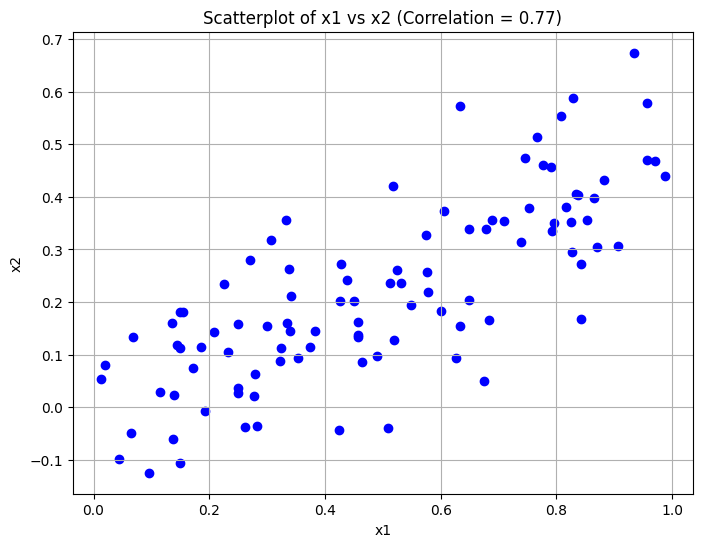

0.772324497691354

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10

correlation = np.corrcoef(x1, x2)[0, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, color='blue')
plt.title(f'Scatterplot of x1 vs x2 (Correlation = {correlation:.2f})')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

correlation


(b) The correlation between x1 and x2 is 0.77.

In [ ]:
import statsmodels.api as sm
import numpy as np

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

X = np.column_stack((x1, x2))
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           5.76e-08
Time:                        21:45:07   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

(c) Here as we can see from the output that the p-values of both "x1" and "x2" are lower than 0.05 thus, we can reject both null hypothesis that are:- H0: β1 = 0 and H0: β2 = 0.

Also, the estimated coefficients are close to similar to the true coefficients.

In [ ]:
import statsmodels.api as sm
import numpy as np

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
y = 2 + 2 * x1 + np.random.normal(size=100)

X = sm.add_constant(x1)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     27.00
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           1.11e-06
Time:                        21:58:21   Log-Likelihood:                -137.67
No. Observations:                 100   AIC:                             279.3
Df Residuals:                      98   BIC:                             284.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9910      0.202      9.875      0.0

(d) From the output obtained we can infer that the estimated coefficient of x1 is very close to it's true value (β1=2). Also, the p-value of x1 is very small and thus we can rejct the null hypothesis H0: β1=0.

In [ ]:
import statsmodels.api as sm
import numpy as np

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

X = sm.add_constant(x2)

model = sm.OLS(y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     26.55
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           1.33e-06
Time:                        22:11:23   Log-Likelihood:                -141.67
No. Observations:                 100   AIC:                             287.3
Df Residuals:                      98   BIC:                             292.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3097      0.164     14.096      0.0

(e) Here, the stimated coefficient of x2 is much higher than the true value (β2 = 0.3). Also, the p-value is also very small due to which we can reject the null hypothesis H0: β2 = 0.

We can also infer from the output data that even though x2 is correlated to x1, it still has a significant impact on y.



(f) No the results from (c) - (e) do not contradict each other.



*   In (c), when both **x1** and **x2** are included, the model correctly estimates the coefficients for both the predictors **x1** and **x2**.
*   In (d) and (e), when either **x1** or **x2** is excluded, the remaining variable takes on the roll of the missing variable. This is why **estimated β1** is slightly higher when **x2** is excluded and **estimated β2** is significantly higher when **x1** is omitted.



In [ ]:
# Add the new observation
x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])

# (c) Model: Predict y using both x1 and x2
X_both = sm.add_constant(np.column_stack((x1_new, x2_new)))
model_both = sm.OLS(y_new, X_both).fit()
print(model_both.summary())

# (d) Model: Predict y using only x1
X_x1 = sm.add_constant(x1_new)
model_x1 = sm.OLS(y_new, X_x1).fit()
print(model_x1.summary())

# (e) Model: Predict y using only x2
X_x2 = sm.add_constant(x2_new)
model_x2 = sm.OLS(y_new, X_x2).fit()
print(model_x2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     23.16
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           5.79e-09
Time:                        22:28:25   Log-Likelihood:                -138.63
No. Observations:                 101   AIC:                             283.3
Df Residuals:                      98   BIC:                             291.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8868      0.199      9.492      0.0

(g) Model (c) (with both x1 and x2) is more robust to the mismeasured observation, but the new point is an outlier.

Model (d) (with only x1) will be more severely impacted, as x1=0.1 is far from most of the data, making the new point potentially an outlier.

Model (e) (with only x2) is somewhat less impacted by leverage, but the new observation might still be an outlier.